In [1]:
from skmap.io import RasterData
from scipy.stats import theilslopes
from eumap.misc import find_files, nan_percentile, ttprint
from eumap.raster import read_rasters, save_rasters

files = find_files(f'/mnt/inca/tillage_index/visual_check_tmp/005W_37N/','skmap_aggregate.bs.yearly_*.tif')
data,_ = read_rasters(raster_files=files, n_jobs = 96, verbose=True)

[11:20:14] Reading 23 raster files using 96 workers


In [5]:
from multiprocessing import Pool
import numpy as np

def apply_theilslopes(args):
    i, j, x, y = args
    slope, intercept, low_slope, high_slope = theilslopes(y, x)
    return i, j, slope

ttprint('start computing')
x = np.arange(0,data.shape[2])
tasks = [(i, j, x, data[i,j,:]) for i in range(data.shape[0]) for j in range(data.shape[1])]

with Pool(96) as pool:
    results = pool.map(apply_theilslopes, tasks)
    
slope_matrix = np.zeros((data.shape[0], data.shape[1]))
for result in results:
    i, j, slope = result
    slope_matrix[i, j] = slope
    
ttprint('finish')

[11:22:20] start computing
[11:25:25] finish


In [12]:
out_file = ['/mnt/inca/tillage_index/visual_check_tmp/test_skmap_bs_trend_20000101_20221231.tif']
save_rasters(files[0], out_file, slope_matrix, dtype='float32', verbose=True)

[10:00:40] Writing 1 raster files using 4 workers


['/mnt/inca/tillage_index/visual_check_tmp/test_skmap_bs_trend_20000101_20221231.tif']

In [7]:
slope_matrix.shape

(4004, 4004)

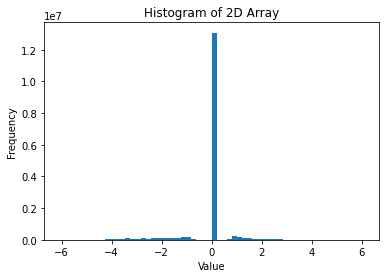

In [11]:
import matplotlib.pyplot as plt
plt.hist(slope_matrix.flatten(), bins=60)
plt.title('Histogram of 2D Array')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [6]:
np.min(slope_matrix)

-6.090909090909091

0.0


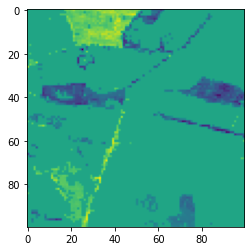

Task was destroyed but it is pending!
task: <Task pending name='Task-2' coro=<Kernel.poll_control_queue() running at /opt/conda/lib/python3.8/site-packages/ipykernel/kernelbase.py:227> wait_for=<Future finished result=[<zmq.sugar.fr...x7fd06481a510>, <zmq.sugar.fr...x7fd322168880>, <zmq.sugar.fr...x7fd0643ee040>, <zmq.sugar.fr...x7fd064368a90>, <zmq.sugar.fr...x7fd0647fbf60>, <zmq.sugar.fr...x7fd0647fb1a0>, ...]> cb=[_chain_future.<locals>._call_set_state() at /opt/conda/lib/python3.8/asyncio/futures.py:367]>


In [14]:
import matplotlib.pyplot as plt
data_win = slope_matrix[1600:1600+100,1600:1600+100]
print(data_win[0,0])
plt.imshow(data_win)
plt.show()

In [10]:
data.dtype

dtype('float16')